# Описание проекта

**Цель:** приоритизировать имеющиеся гипотезы, запустите A/B-тест и проанализировать результаты.

<details>
<summary> Описание данных </summary>
  
Датасет hypothesis:

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Датасет orders:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Датасет visitors:
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста
    
</details>

**Порядок действий:**
1. Приоритизация гипотез
2. Анализ A/B-теста

    - график кумулятивной выручки по группам
    - график кумулятивного среднего чека по группам
    - график относительного изменения кумулятивного среднего чека группы B к группе A
    - график кумулятивной конверсии по группам
    - график относительного изменения кумулятивной конверсии группы B к группе A
    - точечный график количества заказов по пользователям
    - 95-й и 99-й перцентили количества заказов на пользователя. 
    - точечный график стоимостей заказов
    - 95-й и 99-й перцентили стоимости заказов. 
    - статистическая значимость различий в конверсии между группами по «сырым» данным. 
    - статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. 
    - статистическая значимость различий в конверсии между группами по «очищенным» данным. 
    - статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
3. Вывод

## 1. Приоритизация гипотез

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [5]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [6]:
hypothesis.sort_values(by='ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


In [7]:
hypothesis.sort_values(by='RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


В файле 9 гипотез по увеличению выручки интернет-магазина.   
При применении фреймворка ICE, в топе гипотезы: 
- "Запустить акцию, дающую скидку на товар в день..."
- "Добавить два новых канала привлечения трафика,..."
- "Добавить форму подписки на все основные страни..."

В этих гипотезах есть уверенность, что изменения положительно повлияют на пользователей, при этом усилия/затраты на эти гипотезы средние.

При применении фреймворка RICE, в топе гипотезы: 
- "Добавить форму подписки на все основные страни..."
- "Добавить блоки рекомендаций товаров на сайт ин.."
- "Добавить два новых канала привлечения трафика,..."
- "Показать на главной странице баннеры с актуаль..."

Разница обусловлена тем, что алгоритм RICE учитывает охват пользователей. Самая перспективная гипотеза, которая присутствует в топе при применении обоих фреймворков, и по расчету RICE значительно превосходит остальные гипотезы: "Добавить форму подписки на все основные страни...". Изменения охватят всех пользователей. При этом потребуются средние усилия для реализации. 
Гипотезка "Запустить акцию, дающую скидку на товар в день...", которая лидирует по оценке при использовании фреймворка ICE, охватывает минимальное количество пользователей , поэтому не попала в топ при применении фреймворка RICE


## 2.  Анализ A/B-теста 

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [9]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

В обоих датасетах заполнены все строки. Сменили тип данных в столбцах с датами.

In [15]:
#создадим общую таблицу с группировкой по датам и группам
ordersDaily = orders\
    .groupby(['date', 'group'], as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersDaily.columns = ['date', 'group', 'orders', 'buyers', 'revenue']

In [16]:
data = ordersDaily.merge(visitors, on =['date', 'group'], how='left')\

In [17]:
data

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,20,19,93822,619
3,2019-08-02,B,24,23,165531,581
4,2019-08-03,A,24,24,112473,507
...,...,...,...,...,...,...
57,2019-08-29,B,20,20,231130,531
58,2019-08-30,A,11,10,86460,490
59,2019-08-30,B,24,24,215233,490
60,2019-08-31,A,12,12,61833,699


### График кумулятивной выручки по группам.

In [19]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

In [20]:
# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                    .agg(
                                        {'date' : 'max', 
                                         'group' : 'max', 
                                         'transactionId' : pd.Series.nunique, 
                                         'visitorId' : pd.Series.nunique, 
                                         'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [21]:
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [22]:
#аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg(
                                           {'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [23]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [24]:
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708
58,2019-08-30,A,545,493,4022970,18037
59,2019-08-30,B,620,567,5774631,18198
60,2019-08-31,A,557,503,4084803,18736


In [26]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'кум.выручка, ден.ед')

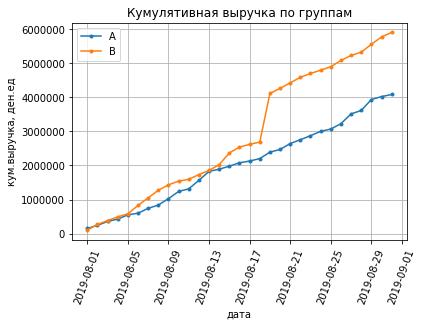

In [25]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], '.-', label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], '.-', label='B')

plt.grid()
plt.legend()
plt.xticks(rotation=70)
plt.title('Кумулятивная выручка по группам')
plt.xlabel('дата')
plt.ylabel('кум.выручка, ден.ед')


Выручка группы А почти равномерно увеличивается в течение всего теста. 
Однако график выручки группы В имеет резкий подъем. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Такие выбросы проанализируем дальше.


### График кумулятивного среднего чека по группам.

Text(0, 0.5, 'средний чек, ден.ед')

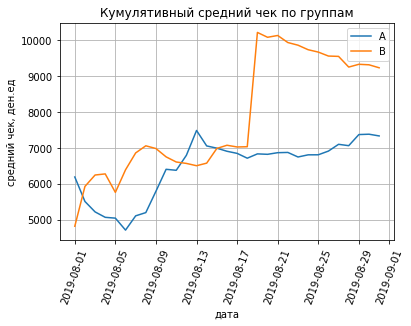

In [26]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.legend()
plt.xticks(rotation=70)
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('дата')
plt.ylabel('средний чек, ден.ед')


Средний чек тоже становится более равномерным ближе к концу теста: почти установился для группы A и продолжает падать для группы B. В группу B в середине теста попали крупные заказы (резкий всплеск на графике), поэтому нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Text(0.5, 0, 'дата')

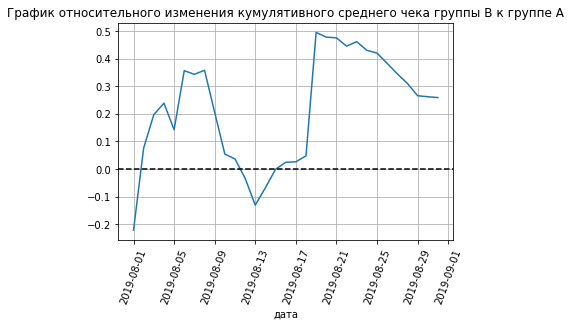

In [28]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.xticks(rotation=70)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата')


### График кумулятивной конверсии по группам

In [29]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [30]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Text(0.5, 0, 'дата')

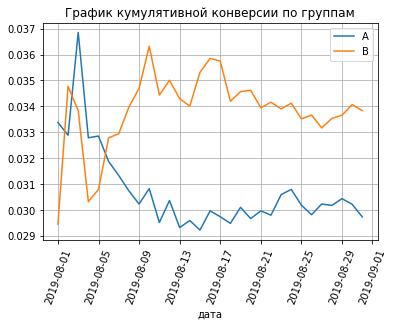

In [31]:
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.grid()
plt.legend()
plt.xticks(rotation=70)
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('дата')


График "скачет", конверсии пока не зафиксировались около одного значения.  
Конверсия группы В выше, чем группы А, хотя в начале эксперимента была ниже.

### График относительного изменения кумулятивной конверсии группы B к группе A.

In [32]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Text(0.5, 0, 'дата')

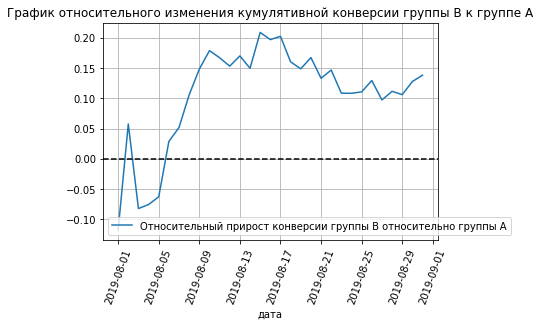

In [33]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.xticks(rotation=70)
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('дата')


В начале теста группа B проигрывала группе A, затем вырвалась вперёд. Конверсия группы В значительно и стабильно превышает конверсию группы А. 
В целом отношение конверсии ещё не установилось.
Проанализируем аномалии, возможно, они изменят картину. 


### Точечный график количества заказов по пользователям.

In [34]:
# Подсчитаем количество заказов по пользователям 
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['visitorId','orders']


Text(0.5, 1.0, 'Точечная диаграмма числа заказов на одного пользователя')

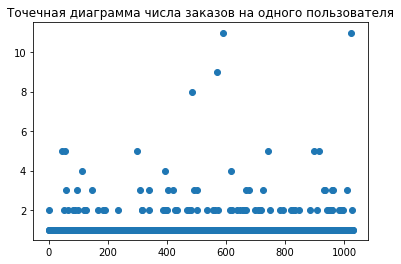

In [35]:
# Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')

Много пользователей с 2-3 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.
Посчитаем выборочные перцентили количества заказов на одного пользователя

### 95-й и 99-й перцентили количества заказов на пользователя

In [36]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше, чем 2 заказа. И только 1% пользователей заказывал более четырех раз.
Выберем 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеем в дальнейшем аномальных пользователей. 

### Точечный график стоимостей заказов.

Text(0.5, 1.0, 'Точечный график стоимостей заказов на одного пользователя')

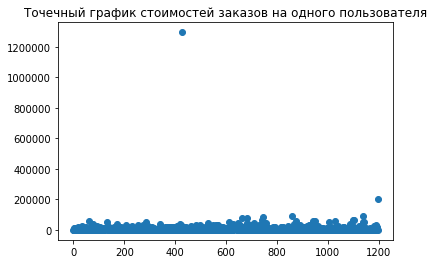

In [37]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов на одного пользователя')

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Только в 5% случаев стоимость заказа превышет 28 тыс, в 1% случаев - выше 58 тыс.На графике явно виден заказ стоимостью 1.2 млн, который значительно влияет на данные. 

### Статистическая значимость различий в конверсии между группами по «сырым» данным.

In [39]:
#для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']


In [40]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data[data['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data[data['group'] == 'B']['visitors'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


In [41]:
#применим критерий Манна-Уитни
stats.mannwhitneyu(sampleA, sampleB)[1]

0.008396177528376304

p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу отвергаем. Это говорит о том, что между группами есть статистически значимые различия в конверсии. 

In [42]:
#Выведем относительный прирост конверсии группы B
sampleB.mean()/sampleA.mean()-1

0.13807884655320146

Относительный выигрыш группы B равен 13.8% 

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [43]:
#рассчитаем статистическую значимость различий в среднем чеке между сегментами
stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

0.3646454927716229

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

In [44]:
orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1

0.2587136699126005

Хоть статистические различия незначимы, средний чек группы B значительно выше среднего чека группы A. Вероятно, влияют выбросы. Посчитаем статистическую значимость по «очищенным» данным 

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Выше выяснили, что 95% пользователей совершают не больше 2-х заказов. Чтобы не удалять слишком много данных, возьмем стоимость заказа, не превышающую 40000, это примерно 97-98% пользователей

In [45]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 40000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()


In [46]:
abnormalUsers.shape

(45,)

In [47]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data[data['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data[data['group'] == 'A']['visitors'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)


In [48]:
stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

0.0025562729777364

In [49]:
sampleBFiltered.mean()/sampleAFiltered.mean()-1

0.19418932581280268

В очищенных данных p-value = 0.002, тоже меньше 0.05. Значит, нулевую гипотезу отвергаем.  Статистически значимые различия в конверсии есть.  
Относительный прирост конверсии в группе В составляет 19,4%

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [50]:
stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]


0.4722040449007405

In [51]:
orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1


0.0580301155636358

P-value увеличился, но и разница между сегментами сократилась с 26% до 6%, так влияли аномальные данные . 
Статистических различий в среднем чеке нет. 


### Вывод


- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий.
- График различия конверсии между группами сообщает, что результаты группы B стабильно лучше группы A
- График различия среднего чека колеблется: он-то и позволил найти аномалии. Сделать из этого графика определённые выводы нельзя

Т.к. конверсия группы В стабильно лучше группы А , принято решение остановить тест, зафиксировать победу группы В.